In [2]:
import numpy as np
from scipy.ndimage import affine_transform
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
test_labels_path = 'C:/Users/twest/Documents/school/Master/Deep Learning/Project/Code/testlabels_183.npy'
test_data_path = 'C:/Users/twest/Documents/school/Master/Deep Learning/Project/Code/testdata48_183.npy'
train_labels_path = 'C:/Users/twest/Documents/school/Master/Deep Learning/Project/Code/traininglabels_183.npy'
train_data_path = 'C:/Users/twest/Documents/school/Master/Deep Learning/Project/Code/trainingdata48_183.npy'
test_labels = np.load(test_labels_path)
test_data = np.load(test_data_path)
train_labels = np.load(train_labels_path)
train_data = np.load(train_data_path)

In [4]:
def augmentation(data, labels, num_Trans):
    """
    Create num_trans different random affine transformations for each
    of the data point in the dataset and shuffle the dataset after
    """
    #New_data = np.array([]).reshape(data.shape[1],data.shape[2],0)
    #New_labels = np.array([])
    
    New_data = np.zeros((data.shape[0]*(num_Trans+1), data.shape[1], data.shape[2]))
    New_labels = np.zeros((labels.shape[0]*(num_Trans+1)))
    
    count = 0
    
    for i, D in tqdm(enumerate(data)):
        #New_data = np.dstack((New_data, D))
        #New_labels = np.append(New_labels, labels[i])
        
        New_data[count,:,:] = D
        New_labels[count] = labels[i]
        count += 1
        
        plt.imshow(D)
        plt.show()
        
        affine_matrixes = random_matrixes(num_Trans, data.shape[1])
        
        for j in range(num_Trans):
            affine = affine_transform(D, affine_matrixes[j,:,:])
            
            affine[affine>0.25] = 1
            affine[affine<0.25] = 0
            affine = np.fliplr(affine)
            #affine = affine.astype('int8')
            
            #New_data = np.dstack((New_data, affine))
            #New_labels = np.append(New_labels, labels[i])
            
            New_data[count,:,:] = D
            New_labels[count] = labels[i]
            count += 1
            
            plt.imshow(affine)
            plt.show()
        if i == 0:
            crash
            
    New_data, New_labels = shuffle_data(New_data, New_labels)
    
    return New_data, New_labels

In [5]:
def random_matrixes(num_Trans, size, trans=[-10, 10], rot=[-10, 10], scale=[0.8, 1.2], shear=[-0.3, 0.3]):
    """
    Create the random affine matrixes for the transformations
    """
    transX_F = np.random.uniform(trans[0], trans[1], num_Trans)
    transY_F = np.random.uniform(trans[0], trans[1], num_Trans)
    rot_F   = np.random.uniform(rot[0], rot[1], num_Trans)
    scaleX_F = np.random.uniform(scale[0], scale[1], num_Trans)
    scaleY_F = np.random.uniform(scale[0], scale[1], num_Trans)
    shearX_F = np.random.uniform(shear[0], shear[1], num_Trans)
    shearY_F = np.random.uniform(shear[0], shear[1], num_Trans)
    
    matrixes = []
    
    for i in range(num_Trans):
        mat_trans  = np.array([[1,0,transX_F[i]],[0,1,transY_F[i]],[0,0,1]])
        mat_scale  = np.array([[scaleX_F[i],0,0],[0,scaleY_F[i],0],[0,0,1]])
        mat_shearx = np.array([[1,shearX_F[i],0],[0,1,0],[0,0,1]])
        mat_sheary = np.array([[1,0,0],[shearY_F[i],1,0],[0,0,1]])
        
        theta = rot_F[i] * (np.pi / 180)
        mat_rot1 = np.array([[1,0,size/2],[0,1,size/2],[0,0,1]])
        mat_rot2 = np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]])
        mat_rot3 = np.array([[1,0,-size/2],[0,1,-size/2],[0,0,1]])
        
        mat_rot = mat_rot1 @ mat_rot2 @ mat_rot3
        #mat_rot = np.array([[1,0,0],[0,1,0],[0,0,1]])
        
        mat_all = mat_trans @ mat_scale @ mat_shearx @ mat_sheary @ mat_rot
    
        matrixes.append(mat_all)
    
    return np.asarray(matrixes)

In [6]:
def shuffle_data(data, labels):
    """
    applies a random shuffle on the data and labels
    """
    Shuffled_D = np.zeros(data.shape)
    Shuffled_L = np.zeros(labels.shape)
    
    indexes = np.arange(labels.shape[0])
    np.random.shuffle(indexes)
    
    for i, ind in enumerate(indexes):
        Shuffled_D[i,:,:] = data[ind,:,:]
        Shuffled_L[i] = labels[ind]
    
    return Shuffled_D, Shuffled_L

0it [00:00, ?it/s]

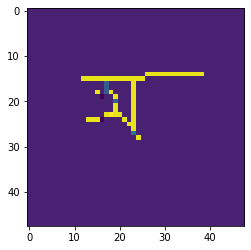

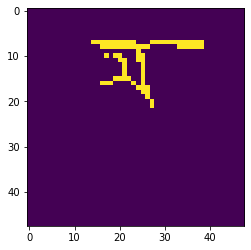

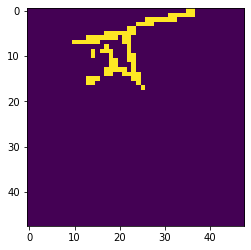

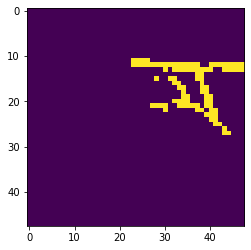

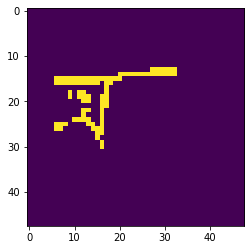

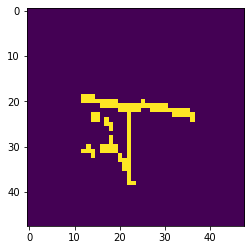

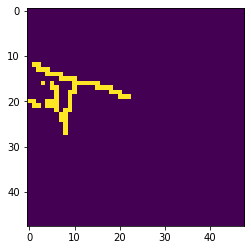

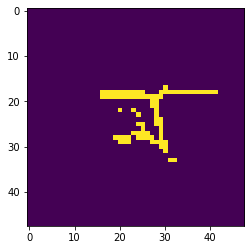

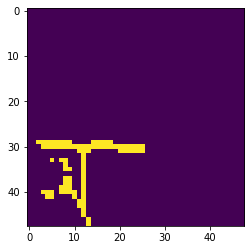

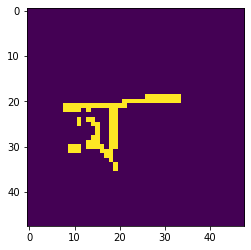

0it [00:00, ?it/s]


NameError: name 'crash' is not defined

In [7]:
New_data, New_labels = augmentation(train_data, train_labels, 9)
np.save('Train_augmented_48',New_data)
np.save('Train_labels_48',New_labels)